## Applied Deep Learning - CSE510
# Stock Market Data Analysis for 2015-2020 Period 
#### By
### **Mohamed Fazil M S [ubid - mm549]**

## Stock Market and Dataset Information
* In for this project we will be using the dataset comprising day to day updated Stock Market Price histories of all the companies listed in the **S&P 500 Index** which comprises  top 500 large companies in the stock exchange at US. A time-frame between year 2015 to 2020 till month july was taken. In this project our goal will be to analyse a dataset which is indexed by its timeframe and analyse how the company stats changes with time on all the companies together. 
* This project has three parts and in the **Third Part** another dataset which has 225 **Financial Indicators** of companies enroled in the stock market at 2019 will be merged accordingly with the our initial dataset to find better insights about the stock market. 

##### Dataset Sources:
* https://www.kaggle.com/qks1lver/amex-nyse-nasdaq-stock-histories
* https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

### Importing the Libraries and Datasets

In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')

#### Import the Main Dataset of all Companies

In [4]:
dataframe = pd.read_csv("fh_5yrs.csv",index_col=0)

#### Filter out the Companies in SP 500 Index list 

In [5]:
sp500 = pd.read_csv("sp500.csv",index_col=0)
sp500_list = sp500.index
print(sp500.index)
dataframe = dataframe[dataframe.symbol.isin(sp500_list)]

Index(['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AMD',
       ...
       'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=505)


## Part 1 - Performing Data Analysis of the Datasets

### 1. How many entries and variables does the data set comprise?

In [6]:
print("Total Number of Companies ->",len(sp500_list))
print("Total Number of Variables ->",dataframe.shape[1])
print("Total Number of Entries ->",dataframe.shape[0])
print("Shape of the Dataframe Constructed ->",dataframe.shape)

Total Number of Companies -> 505
Total Number of Variables -> 7
Total Number of Entries -> 510740
Shape of the Dataframe Constructed -> (510740, 7)


* The total number of Companies(or Symbols in Market) considered are **505 companies**.
* The total number of Variables present in each entry are **7**.
* The total number of entries including all the companies together for a span of 5 years is **510740** entries.

### 2. What types of data is included?

In [7]:
print(dataframe.info())
dataframe = dataframe.sort_index() # Sorting the Dataset by Ascending Date
print('\nSneak peak into Given Dataframe\n-------------------------------')
dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 510740 entries, 2020-07-02 to 2015-01-02
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volume    510740 non-null  int64  
 1   open      510740 non-null  float64
 2   high      510740 non-null  float64
 3   low       510740 non-null  float64
 4   close     510740 non-null  float64
 5   adjclose  510740 non-null  float64
 6   symbol    510740 non-null  object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.2+ MB
None

Sneak peak into Given Dataframe
-------------------------------


,volume,open,high,low,close,adjclose,symbol
date,,,,,,,
2015-01-02,1784200,43.459999,43.700001,43.070000,43.310001,41.688309,ZTS
2015-01-02,1312500,67.019997,68.260002,65.989998,67.339996,48.876850,HP
2015-01-02,2021300,89.669998,90.089996,88.430000,88.839996,79.503258,ACN
2015-01-02,1259900,28.570000,28.680000,28.049999,28.350000,28.107077,PWR
2015-01-02,1460700,26.830000,27.000000,26.150000,26.379999,26.379999,HOLX
...,...,...,...,...,...,...,...
2020-07-02,1283200,114.489998,114.489998,111.720001,112.300003,112.300003,ALXN
2020-07-02,685800,47.450001,47.810001,45.389999,45.730000,45.730000,REG
2020-07-02,15118600,12.790000,13.110000,12.570000,12.570000,12.570000,HAL


Each entry consist of 7 attributes and indexed by date object.
* **Date** - Year-month-day, It is a date object which is used to index the entries by timeframe.
* **Volume** - Integer, It is the total number of shares traded and available for future.
* **open** - Float, It is the opening price of a share on that day.
* **high** - Float, It is the Highest price of the share touched that day.
* **low** - Float, It is the Lowest price of the share touched that day.
* **close** - Float, It is the Closing price of a share on that day.
* **adjclose** - Float, It is the actual closing price calculated after corporate actions.
* **symbol** - Name, It is the Symbol given to each company in the Stock Market.


### Generating Moving Averages and Daily Percentage Change for all the Companies Stock History 
It is necessary to generate  more features that is the moving averages for 10,20 and 50 days helps us in determinig the influence of a set of days data which will be used futher in the **Part 2 : Machine Learning** features. And the daily change in percentage of value of each stock is necessary.

#### Adding Moving Averages and Percent Change Columns

In [8]:
dataframe.index = pd.to_datetime(dataframe.index)
d = dataframe.loc[dataframe['symbol']==sp500_list[0]]
for i in [10,20,50]:
    col = "ma%sdays" %(str(i))
    d[col]=d['adjclose'].rolling(window=i,center=False).mean()
d['percentchange'] = d['adjclose'].pct_change()

for sym in sp500_list[1:]:
    d2 = dataframe.loc[dataframe['symbol']==sym]
    for i in [10,20,50]:
        coln = "ma%sdays" %(str(i))
        d2[coln]=d2['adjclose'].rolling(window=i,center=False).mean()
    d2['percentchange'] = d2['adjclose'].pct_change()
    d = pd.concat([d,d2])

<ipython-input-8-a5c2e5df69c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d[col]=d['adjclose'].rolling(window=i,center=False).mean()


In [9]:
dataframe = d.copy()
dataframe.sort_index() # Sorting the Dataset by Ascending Date
print('After Generating More Features \n----------------------------')
print(dataframe.info())
dataframe

After Generating More Features 
----------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510740 entries, 2015-01-02 to 2020-07-02
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   volume         510740 non-null  int64  
 1   open           510740 non-null  float64
 2   high           510740 non-null  float64
 3   low            510740 non-null  float64
 4   close          510740 non-null  float64
 5   adjclose       510740 non-null  float64
 6   symbol         510740 non-null  object 
 7   ma10days       507401 non-null  float64
 8   ma20days       503691 non-null  float64
 9   ma50days       492561 non-null  float64
 10  percentchange  510369 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 46.8+ MB
None


,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,percentchange
date,,,,,,,,,,,
2015-01-02,2116400,164.710007,165.080002,162.729996,164.059998,140.665863,MMM,NaN,NaN,NaN,NaN
2015-01-05,3692900,163.000000,163.639999,160.080002,160.360001,137.493500,MMM,NaN,NaN,NaN,-0.022552
2015-01-06,3532000,160.820007,161.369995,157.740005,158.649994,136.027313,MMM,NaN,NaN,NaN,-0.010664
2015-01-07,3081300,159.899994,160.279999,158.940002,159.800003,137.013367,MMM,NaN,NaN,NaN,0.007249
2015-01-08,3142900,160.649994,163.690002,160.520004,163.630005,140.297195,MMM,NaN,NaN,NaN,0.023967
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,2612800,135.000000,135.750000,132.600006,132.660004,132.660004,ZTS,135.845000,137.3735,132.0534,-0.019585
2020-06-29,2126400,133.259995,133.550003,131.279999,131.979996,131.979996,ZTS,135.712999,137.0555,132.0786,-0.005126
2020-06-30,1878800,132.100006,137.820007,132.059998,137.039993,137.039993,ZTS,135.792998,136.8335,132.2716,0.038339


**Four More genrated Variables are Added to the Dataframe Now**
* **ma10days,ma20days,ma50days** - They are the moving averages of adjusted closing stock price for 10,20 and 50 days respc.
* **percentchange** - This is the percentage of change in stock price within a day.

### 3. Are there any data missing?

In [10]:
dataframe.isnull()

,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,percentchange
date,,,,,,,,,,,
2015-01-02,False,False,False,False,False,False,False,True,True,True,True
2015-01-05,False,False,False,False,False,False,False,True,True,True,False
2015-01-06,False,False,False,False,False,False,False,True,True,True,False
2015-01-07,False,False,False,False,False,False,False,True,True,True,False
2015-01-08,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,False,False,False,False,False,False,False,False,False,False,False
2020-06-29,False,False,False,False,False,False,False,False,False,False,False
2020-06-30,False,False,False,False,False,False,False,False,False,False,False


In [11]:
print('volume - ',dataframe['volume'].isnull().values.any())
print('open - ',dataframe['open'].isnull().values.any())
print('high - ',dataframe['high'].isnull().values.any())
print('low - ',dataframe['low'].isnull().values.any())
print('close - ',dataframe['close'].isnull().values.any())
print('adjclose - ',dataframe['adjclose'].isnull().values.any())
print('symbol - ',dataframe['symbol'].isnull().values.any())
print('ma10days - ',dataframe['ma10days'].isnull().values.any())
print('ma20days - ',dataframe['ma20days'].isnull().values.any())
print('ma50days - ',dataframe['ma50days'].isnull().values.any())
print('percentchange - ',dataframe['percentchange'].isnull().values.any())

volume -  False
open -  False
high -  False
low -  False
close -  False
adjclose -  False
symbol -  False
ma10days -  True
ma20days -  True
ma50days -  True
percentchange -  True


For this given dataset there are missing data in the Colums
* ma10days
* ma20days
* ma50days
* percentagechange

In [12]:
print('ma10days missing - ',dataframe['ma10days'].isnull().sum().sum())
print('ma20days missing - ',dataframe['ma20days'].isnull().sum().sum())
print('ma50days missing - ',dataframe['ma50days'].isnull().sum().sum())
print('percentchange missing - ',dataframe['percentchange'].isnull().sum().sum())

ma10days missing -  3339
ma20days missing -  7049
ma50days missing -  18179
percentchange missing -  371


### 4. Provide the main statistics about the entries of the dataset (mean, std, etc.)

In [13]:
dataframe.describe()

,volume,open,high,low,close,adjclose,ma10days,ma20days,ma50days,percentchange
count,5.107400e+05,510740.000000,510740.000000,510740.000000,510740.000000,510740.000000,507401.000000,503691.000000,492561.000000,510369.000000
mean,4.758008e+06,95.734892,96.734489,94.699342,95.744349,92.201955,92.193415,92.182494,92.157244,0.000379
std,9.681864e+06,116.852509,118.062321,115.593886,116.883870,116.815147,116.513482,116.205950,115.392264,0.021332
min,1.000000e+02,1.620000,1.690000,1.610000,1.620000,1.620000,1.728000,1.787000,1.822800,-0.761393
25%,1.164500e+06,42.810001,43.279999,42.320000,42.810001,39.844812,39.881645,39.941178,40.124424,-0.007786
50%,2.245600e+06,68.930000,69.639999,68.201099,68.949997,64.383602,64.427473,64.504038,64.648800,0.000756
75%,4.632925e+06,111.339996,112.440002,110.190002,111.349998,106.787891,106.820042,106.840945,106.837859,0.009051
max,4.485859e+08,2912.010010,2955.560059,2871.100098,2890.300049,2890.300049,2754.329004,2669.227502,2509.942808,0.761765


Above is give all the main statistical information of all the entries specific to each column/variable.
The statistical quantities measured are -
* **Count** - Total number of non-null values present
* **mean** - It is the average of all the values present in the column
* **std** - It is the Standard Deviation of the data present 
* **min** - Minimum value at that column
* **25%** - It is 25% percentile of the data present.
* **50%** - It is the 50% percentile of the data present which is same as the median.
* **75%** - It is the 75% percentile of the data present.
* **max** - Maximum value of the column.

### 5. Visualize the data (min 3 graphs), e.g. correlation between different variables. 
### Are there any interesting patterns?

To visualize this enourmous dataset properly we can initially choose big moving companies and take only their datasets compare.
For example lets consider the Stocks History of Tesla, Google, Amazon, Microsoft and Apple.

In [14]:
facebook = dataframe.loc[dataframe['symbol']=='FB']
google = dataframe.loc[dataframe['symbol']=='GOOG']
amazon = dataframe.loc[dataframe['symbol']=='AMZN']
microsoft = dataframe.loc[dataframe['symbol']=='MSFT']
apple = dataframe.loc[dataframe['symbol']=='AAPL']

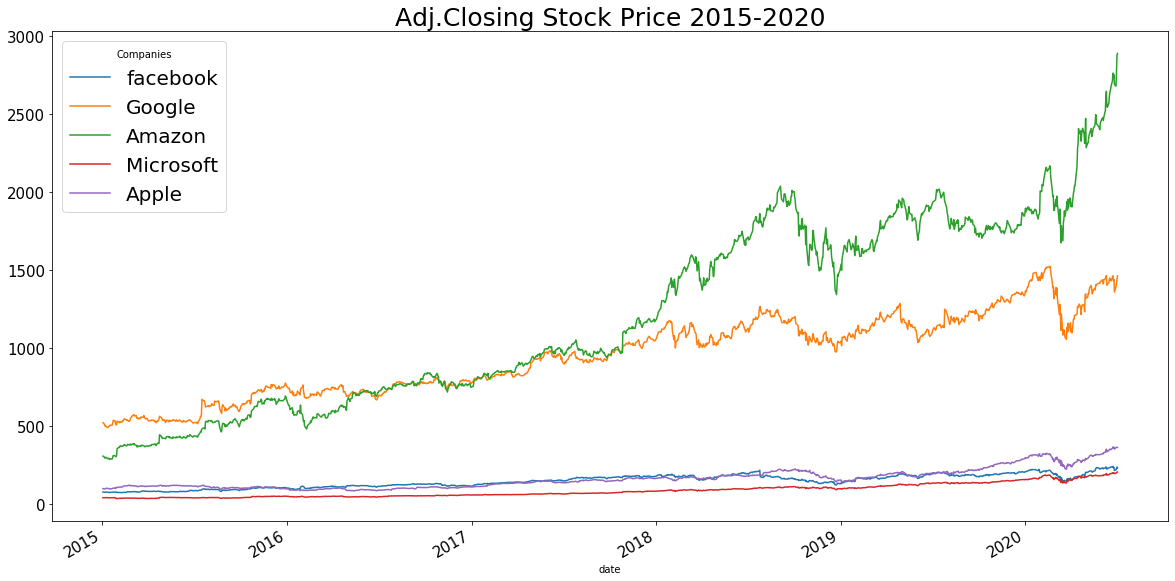

In [15]:
plt.title('Adj.Closing Stock Price 2015-2020',fontsize=25)
facebook['adjclose'].plot(label = 'facebook',figsize = (20,10),fontsize=15)
google['adjclose'].plot(label='Google')
amazon['adjclose'].plot(label = 'Amazon')
microsoft['adjclose'].plot(label = 'Microsoft')
apple['adjclose'].plot(label = 'Apple')
plt.legend(title='Companies',fontsize=20)
plt.show()

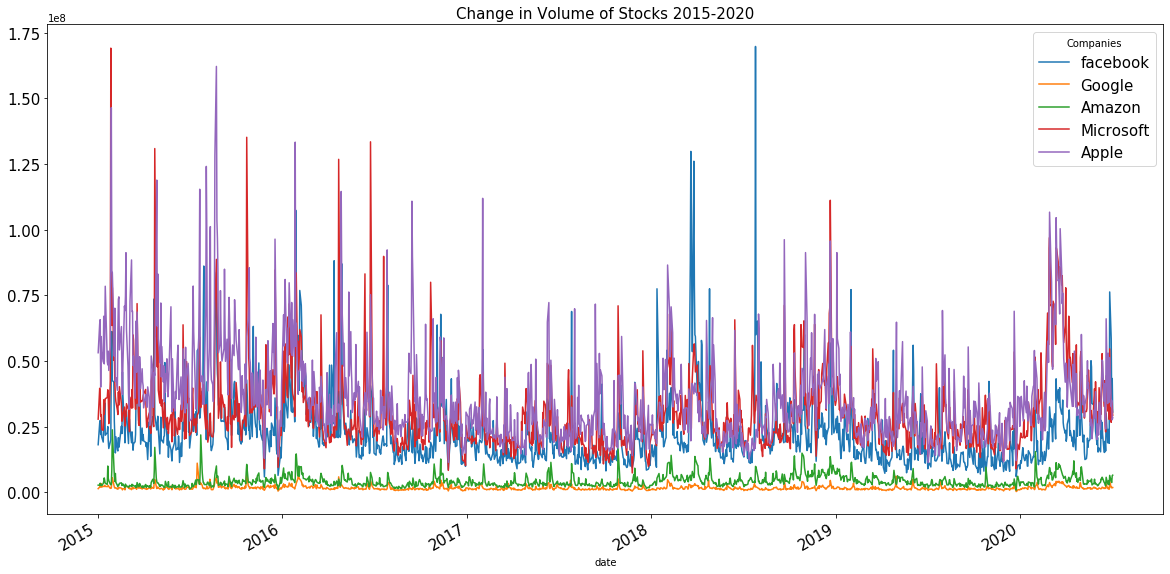

In [16]:
plt.title('Change in Volume of Stocks 2015-2020',fontsize=15)
facebook['volume'].plot(label = 'facebook',figsize = (20,10),fontsize=15)
google['volume'].plot(label='Google')
amazon['volume'].plot(label = 'Amazon')
microsoft['volume'].plot(label = 'Microsoft')
apple['volume'].plot(label = 'Apple')
plt.legend(title='Companies',fontsize=15)
plt.show()

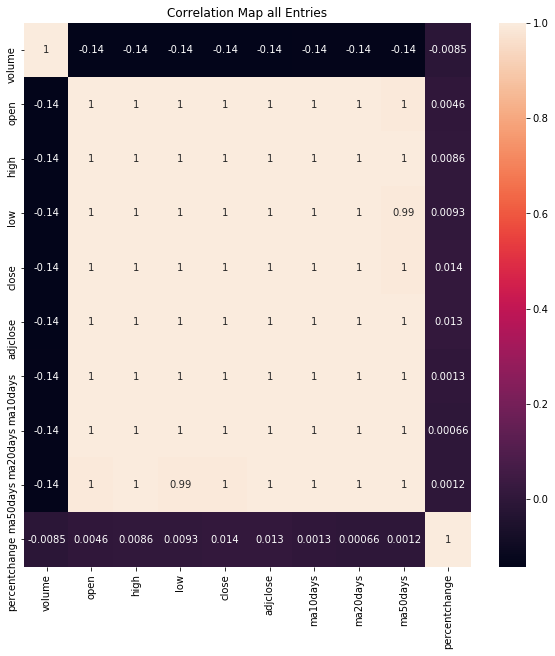

In [17]:
data_corr = dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data_corr,annot=True).set_title('Correlation Map all Entries')
plt.show()

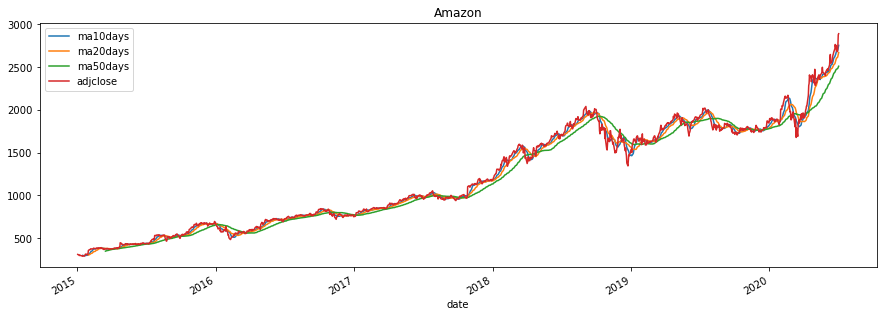

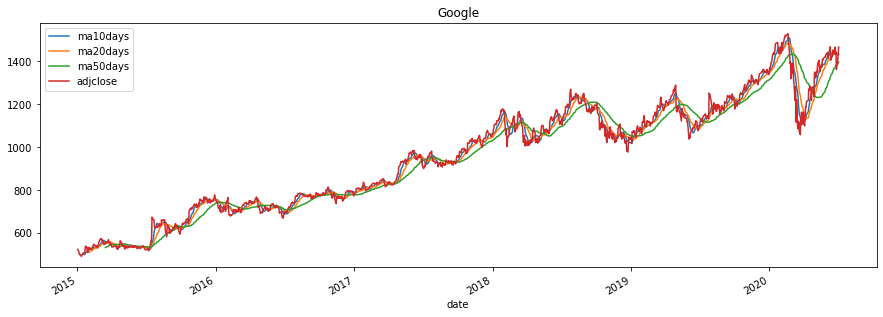

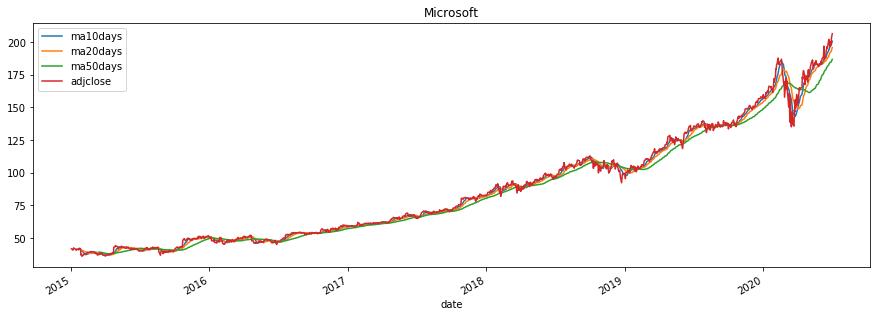

In [18]:
# Moving Average Plot
amazon[['ma10days','ma20days','ma50days','adjclose']].plot(figsize=(15,5),title='Amazon')
plt.show()
google[['ma10days','ma20days','ma50days','adjclose']].plot(figsize=(15,5),title='Google')
plt.show()
microsoft[['ma10days','ma20days','ma50days','adjclose']].plot(figsize=(15,5),title='Microsoft')
plt.show()

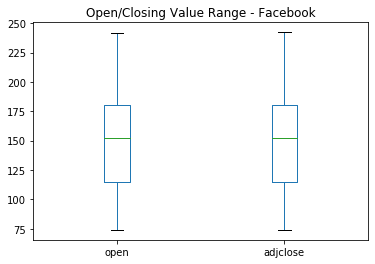

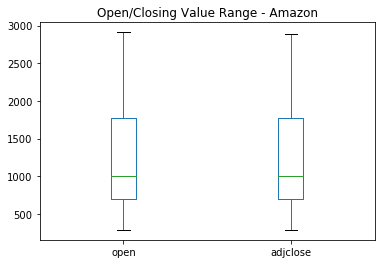

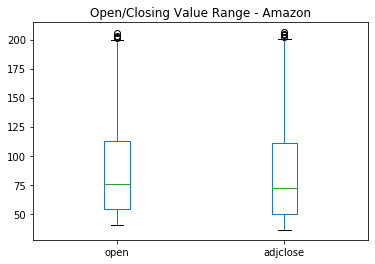

In [19]:
facebook[['open','adjclose']].plot(kind='box',title='Open/Closing Value Range - Facebook')
amazon[['open','adjclose']].plot(kind='box',title='Open/Closing Value Range - Amazon')
microsoft[['open','adjclose']].plot(kind='box',title='Open/Closing Value Range - Amazon')
plt.show()

## Part 2 - Applying Machine Learning Analysis

### Importing Machine Learning Libraries

In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, SGDRegressor, Lasso

### Problem Statement - Predict the Stock Value 7, 15, 30 days ahead of the Current day
* In our prediction problem we will be trying to predict the stock values of companies in the future that is N number of days ahead using its previous data generated. 
* The uniqueness about the machine learning model implemented here is the consideration of all the 500 companies data change which influences the prediction of each and every company.
* We will be having a single machine learning model which can be used on all the 500 companies listed in the SP 500 list.
* We will be dividing the datasets into **Training, Testing and Validation datasets**. Further the target output will also be genrated.

### 1. Choose the features and targets in the dataset

**Features Choosen**

|    Features   |     Data form     |                    Significance                   |
|:-------------:|:-----------------:|:-------------------------------------------------:|
|     volume    |        int        |                Volume of the Stocks               |
|      open     |       float       |                   Opening Price                   |
|      high     |       float       |              Highest Price of the Day             |
|    adjclose   |       float       |               Adjusted Closing Price              |
|   symbol_cat  | int (Categorical) | 500 Companies represented  as categorical [0-500] |
|    ma10days   |       float       |           Average of Past 10 days price           |
|    ma20days   |       float       |           Average of Past 20 days price           |
|    ma50days   |       float       |           Average of past 50 days Price           |
| percentchange |       float       |           Percentage of  change in Price          |

**Target Choosen**
For the Target we will be taking the Adjusted Closing price of the 7th day from our current day.

|       Target      | Data form |       Significance       |
|:-----------------:|:---------:|:------------------------:|
| adjclose7days     |   float   | Stock Price N days ahead |

### 2. Preprocess the dataset for training (e.g. cleaning and filling the missing variables, split between training/testing/validation).

### Cleaning and Filling the Missing Variables

In [19]:
dataframe.isnull()

,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,percentchange
date,,,,,,,,,,,
2015-01-02,False,False,False,False,False,False,False,True,True,True,True
2015-01-05,False,False,False,False,False,False,False,True,True,True,False
2015-01-06,False,False,False,False,False,False,False,True,True,True,False
2015-01-07,False,False,False,False,False,False,False,True,True,True,False
2015-01-08,False,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,False,False,False,False,False,False,False,False,False,False,False
2020-06-29,False,False,False,False,False,False,False,False,False,False,False
2020-06-30,False,False,False,False,False,False,False,False,False,False,False


#### Missing Data Variables 
**ma10days, ma20days, ma50days, percentagechange**

To handle these missing data we will be replacing it with its preceeding values as in stock market datas immediate next day values does not affect a lot.

In [177]:
processed_df= dataframe.fillna(method='bfill')

#### Generating Encoded Categorical values for Symbols

In [178]:
processed_df['symbol'] = processed_df['symbol'].astype('category') #change symbol datatype to category
processed_df['symbol_cat'] = processed_df['symbol'].cat.codes #Convert it into a integer encoding
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510740 entries, 2015-01-02 to 2020-07-02
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   volume         510740 non-null  int64   
 1   open           510740 non-null  float64 
 2   high           510740 non-null  float64 
 3   low            510740 non-null  float64 
 4   close          510740 non-null  float64 
 5   adjclose       510740 non-null  float64 
 6   symbol         510740 non-null  category
 7   ma10days       510740 non-null  float64 
 8   ma20days       510740 non-null  float64 
 9   ma50days       510740 non-null  float64 
 10  percentchange  510740 non-null  float64 
 11  symbol_cat     510740 non-null  int16   
dtypes: category(1), float64(9), int16(1), int64(1)
memory usage: 44.8 MB


### Generating Target Column - Change Variable N
Change the Variable **N** according to number of days to predict ahead.

In [179]:
N = 30 #7,15,30 Number Of days Ahead
t = processed_df.loc[processed_df['symbol']==sp500_list[0]] # Get one Company at a time
t2 = t.copy()
t['adjclose7day'] = t2['adjclose'].shift(-N) # Shift N days ahead in target column
t = t.iloc[:-N] # Drop Last N days rows

# Apply for all the companies seperately and stack together finally 
for sym in sp500_list[1:]:
    tl = processed_df.loc[processed_df['symbol']==sym]
    t2l = tl.copy()
    tl['adjclose7day'] = t2l['adjclose'].shift(-N)
    tl = tl.iloc[:-N] # Drop Last N days rows
    t = pd.concat([t,tl])
processed_df = t.copy()
processed_df = processed_df.sort_index() # Sorting the Dataset by Ascending Date
processed_df

<ipython-input-179-5a2a5c36dce1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t['adjclose7day'] = t2['adjclose'].shift(-N) # Shift N days ahead in target column


,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,percentchange,symbol_cat,adjclose7day
date,,,,,,,,,,,,,
2015-01-02,2116400,164.710007,165.080002,162.729996,164.059998,140.665863,MMM,137.954771,139.140142,141.651542,-0.022552,235,144.008270
2015-01-02,6029800,72.129997,72.989998,71.410004,71.879997,71.879997,MDT,72.776000,73.344000,75.359200,-0.004174,230,78.070000
2015-01-02,1257600,85.580002,86.260002,84.480003,85.760002,81.493698,EXPE,80.947300,81.191515,83.257233,-0.018190,134,84.277939
2015-01-02,5289400,34.325001,34.564999,33.755001,33.980000,30.437449,TJX,30.127971,30.097291,30.441674,-0.011183,325,30.879723
2015-01-02,4972900,37.080002,37.650002,37.080002,37.570000,30.583059,EXC,29.869157,30.077955,28.662957,-0.028480,133,27.176922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-20,10122500,32.599998,33.259998,32.570000,33.060001,32.674946,USB,31.949492,33.321325,33.305570,0.033448,342,35.889999
2020-05-20,3516000,32.720001,32.950001,32.360001,32.660000,32.660000,DRE,32.140000,33.161000,32.008000,0.024788,109,36.259998
2020-05-20,2710900,83.949997,84.089996,83.139999,83.309998,83.309998,DUK,81.782727,82.651826,81.514650,0.000240,112,81.839996


### Split Training, Validation and Testing Dataset

The Training,Validation and Testing Datasets are split on the basis of Time Period are

|   Dataset  |         Time Period         |
|:----------:|:---------------------------:|
|  training  |  '2015-01-02' - '2019-1-02' |
| validation | '2019-10-03' - '2019-10-02' |
|   testing  | '2019-10-03' - '2020-06-23' |

In [180]:
processed_df.index = pd.to_datetime(processed_df.index) #Make Sure our Index is in Date Time Format

period1 = '2019-01-02'
period2 = '2019-10-02'
training = processed_df.loc[(processed_df.index <= period1)]
validation =  processed_df.loc[(processed_df.index > period1)&(processed_df.index <= period2)]
testing =  processed_df.loc[(processed_df.index > period2)]

training_x = training.drop(columns=['symbol','adjclose7day'])
training_x = training_x.to_numpy() # Converting to Array
training_y = training['adjclose7day']
training_y = training_y.to_numpy()
training_y = training_y.reshape((training_y.shape[0],1))
print('Training X Shape -',training_x.shape)
print('Training y Shape -',training_y.shape)

validation_x = validation.drop(columns=['symbol','adjclose7day'])
validation_x = validation_x.to_numpy() # Converting to Array
validation_y = validation['adjclose7day']
validation_y = validation_y.to_numpy()
validation_y = validation_y.reshape((validation_y.shape[0],1))
print('validation X Shape -',validation_x.shape)
print('validation y Shape -',validation_y.shape)

testing_x = testing.drop(columns=['symbol','adjclose7day'])
testing_x = testing_x.to_numpy() # Converting to Array
testing_y = testing['adjclose7day']
testing_y = testing_y.to_numpy()
testing_y = testing_y.reshape((testing_y.shape[0],1))
print('testing X Shape -',testing_x.shape)
print('testing y Shape -',testing_y.shape)

Training X Shape - (370624, 11)
Training y Shape - (370624, 1)
validation X Shape - (70026, 11)
validation y Shape - (70026, 1)
testing X Shape - (58960, 11)
testing y Shape - (58960, 1)


#### Normalizing the Data

In [165]:
scl = StandardScaler()
training_x = scl.fit_transform(training_x)
testing_x = scl.fit_transform(testing_x)
validation_x = scl.fit_transform(validation_x)

### 3. Apply ML Algorithms
### Different Machine Learning Model with Prediction Results
**(The Prediction Model is tested on different companies for each algorithm and results are ploted right below)**

#### Linear Regression

In [77]:
linear = LinearRegression()
linear.fit(training_x,training_y)
linear_score = linear.score(validation_x,validation_y)
linear_pred = linear.predict(testing_x)
print('Linear Regression Accuracy-',linear_score)

Linear Regression Accuracy- 0.9906070826950892


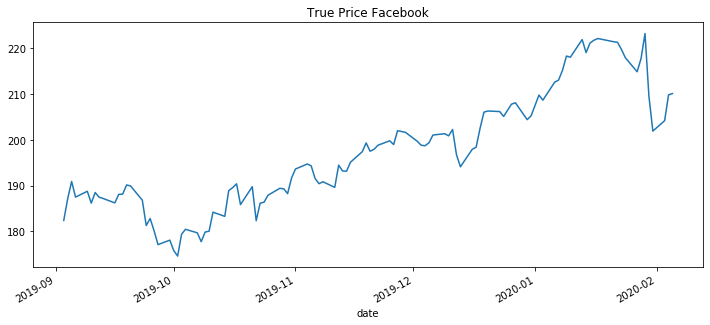

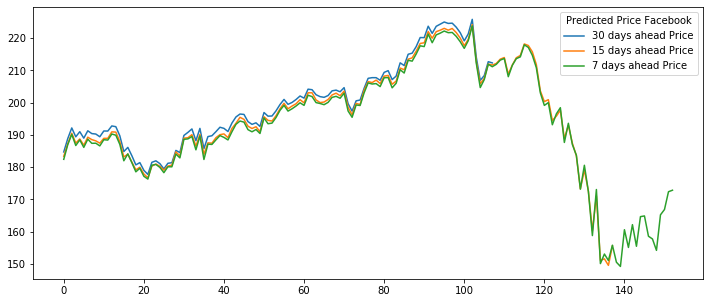

In [78]:
# Predict and plot results for a Specific Company
period1 = '2019-09-02'
company_true = processed_df.loc[processed_df['symbol']=='FB']
company_true = company_true.loc[(company_true.index > period1)]

company_pred = company_true.drop(columns=['symbol','adjclose7day'])
company_pred = company_pred.to_numpy()
# company_pred_7 = linear.predict(company_pred)
# company_pred_15 = linear.predict(company_pred)
company_pred_30 = linear.predict(company_pred)

# True Price
company_true['adjclose'].plot(figsize=(12,5),title='True Price Facebook')
# Predicted Price
t = np.arange(company_pred.shape[0])
plt.figure(figsize=(12,5))
plt.plot(company_pred_30,label='30 days ahead Price')
plt.plot(company_pred_15,label='15 days ahead Price')
plt.plot(company_pred_7,label='7 days ahead Price')
plt.legend(title='Predicted Price Facebook')
plt.show()

#### Neural Networks

In [101]:
mlp = MLPRegressor(max_iter=2000)
mlp.fit(training_x,training_y.ravel())
mlp_score = mlp.score(validation_x,validation_y)
print('MLP Accuracy -',mlp_score)

MLP Accuracy - 0.9201201627608611


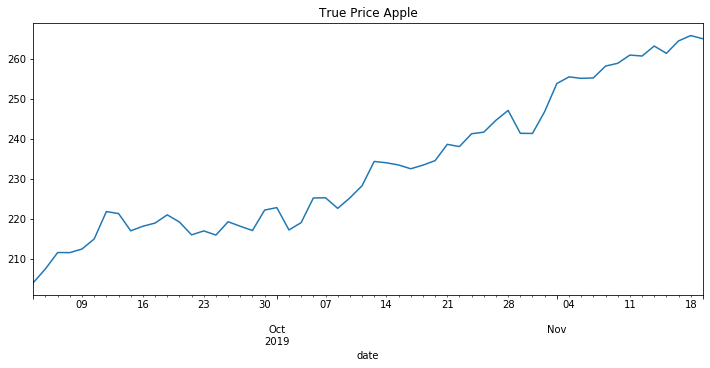

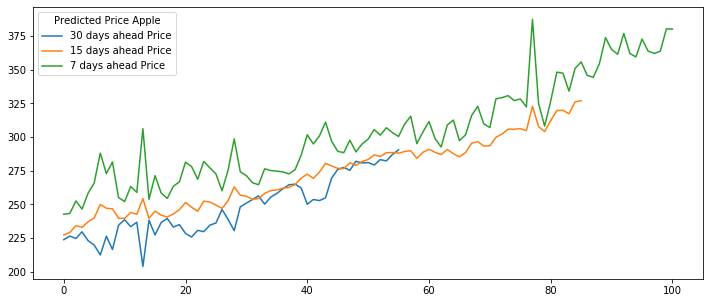

In [103]:
# Predict and plot results for a Specific Company
period1 = '2019-09-02'
company_true = processed_df.loc[processed_df['symbol']=='AAPL']
company_true = company_true.loc[(company_true.index > period1)]

company_pred = company_true.drop(columns=['symbol','adjclose7day'])
company_pred = company_pred.to_numpy()
# company_pred_7 = mlp.predict(company_pred)
# company_pred_15 = mlp.predict(company_pred)
company_pred_30 = mlp.predict(company_pred)

# True Price
company_true['adjclose'].plot(figsize=(12,5),title='True Price Apple')
# Predicted Price
t = np.arange(company_pred.shape[0])
plt.figure(figsize=(12,5))
plt.plot(company_pred_30,label='30 days ahead Price')
plt.plot(company_pred_15,label='15 days ahead Price')
plt.plot(company_pred_7,label='7 days ahead Price')
plt.legend(title='Predicted Price Apple')
plt.show()

#### Elastic Net

In [136]:
els = ElasticNet(max_iter=2000)
els.fit(training_x,training_y)
els_score = els.score(validation_x,validation_y)
print('Elastic Net Accuracy - ',els_score)

Elastic Net Accuracy -  0.9976093693780475


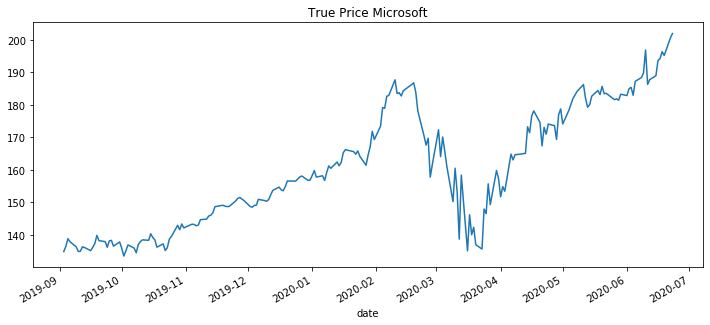

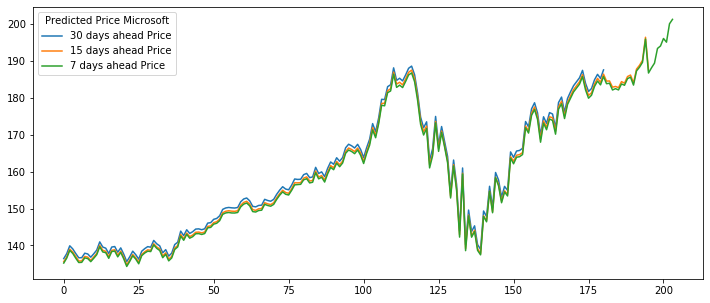

In [137]:
# Predict and plot results for a Specific Company
period1 = '2019-09-02'
company_true = processed_df.loc[processed_df['symbol']=='MSFT']
company_true = company_true.loc[(company_true.index > period1)]

company_pred = company_true.drop(columns=['symbol','adjclose7day'])
company_pred = company_pred.to_numpy()
company_pred_7 = els.predict(company_pred)
# company_pred_15 = els.predict(company_pred)
# company_pred_30 = els.predict(company_pred)

# True Price
company_true['adjclose'].plot(figsize=(12,5),title='True Price Microsoft')
# Predicted Price
t = np.arange(company_pred.shape[0])
plt.figure(figsize=(12,5))
plt.plot(company_pred_30,label='30 days ahead Price')
plt.plot(company_pred_15,label='15 days ahead Price')
plt.plot(company_pred_7,label='7 days ahead Price')
plt.legend(title='Predicted Price Microsoft')
plt.show()

#### Stochastic Gradient Descent 

In [166]:
sgd = SGDRegressor()
sgd.fit(training_x,np.asarray(training_y).ravel())
sgd_score = sgd.score(validation_x,validation_y)
print('SGD Accuracy -',sgd_score)

SGD Accuracy - 0.8592586971644326


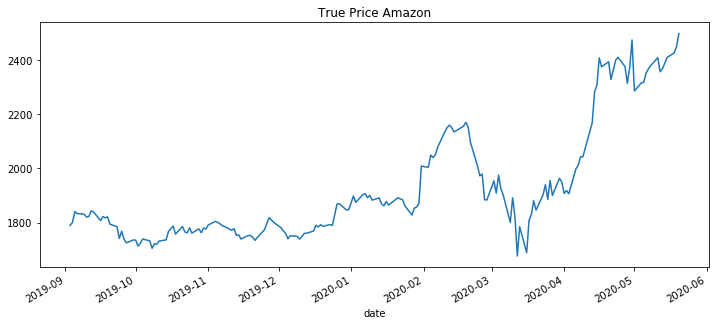

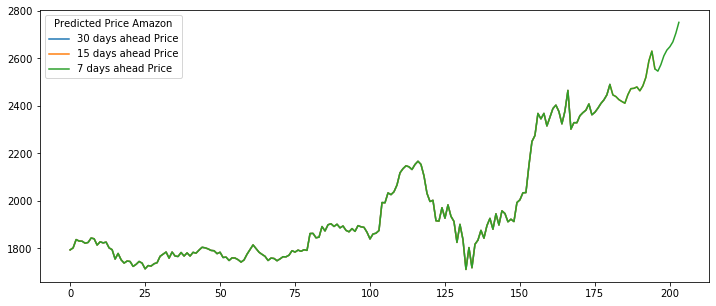

In [167]:
# Predict and plot results for a Specific Company
period1 = '2019-09-02'
company_true = processed_df.loc[processed_df['symbol']=='AMZN']
company_true = company_true.loc[(company_true.index > period1)]

company_pred = company_true.drop(columns=['symbol','adjclose7day'])
company_pred = company_pred.to_numpy()
# company_pred_7 = els.predict(company_pred)
# company_pred_15 = els.predict(company_pred)
company_pred_30 = els.predict(company_pred)

# True Price
company_true['adjclose'].plot(figsize=(12,5),title='True Price Amazon')
# Predicted Price
t = np.arange(company_pred.shape[0])
plt.figure(figsize=(12,5))
plt.plot(company_pred_30,label='30 days ahead Price')
plt.plot(company_pred_15,label='15 days ahead Price')
plt.plot(company_pred_7,label='7 days ahead Price')
plt.legend(title='Predicted Price Amazon')
plt.show()

#### Lasso Regression

In [181]:
lasso = Lasso(max_iter=2000)
lasso.fit(training_x,training_y)
lasso_score = lasso.score(validation_x,validation_y)
print('Lasso Accuracy -',lasso_score)

Lasso Accuracy - 0.9906437453673138


C:\Users\moham\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22399080.623391017, tolerance: 368874.2202044227
  model = cd_fast.enet_coordinate_descent(


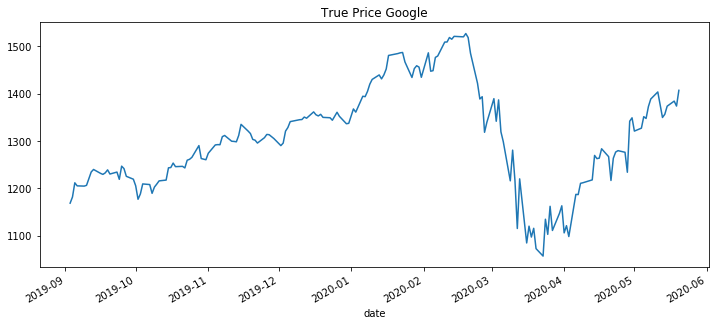

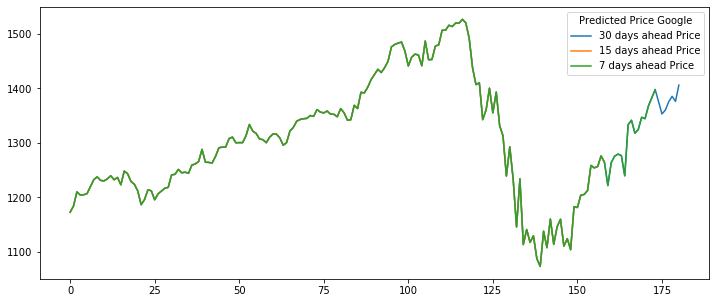

In [182]:
# Predict and plot results for a Specific Company
period1 = '2019-09-02'
company_true = processed_df.loc[processed_df['symbol']=='GOOG']
company_true = company_true.loc[(company_true.index > period1)]

company_pred = company_true.drop(columns=['symbol','adjclose7day'])
company_pred = company_pred.to_numpy()
# company_pred_7 = els.predict(company_pred)
# company_pred_15 = els.predict(company_pred)
company_pred_30 = els.predict(company_pred)

# True Price
company_true['adjclose'].plot(figsize=(12,5),title='True Price Google')
# Predicted Price
t = np.arange(company_pred.shape[0])
plt.figure(figsize=(12,5))
plt.plot(company_pred_30,label='30 days ahead Price')
plt.plot(company_pred_15,label='15 days ahead Price')
plt.plot(company_pred_7,label='7 days ahead Price')
plt.legend(title='Predicted Price Google')
plt.show()

### 4. Provide the comparison of the results of different ML models you have used
The predictive results have been already ploted above coresponding to the Machine Learning Algorithm Used. The Accuracies of each model are.

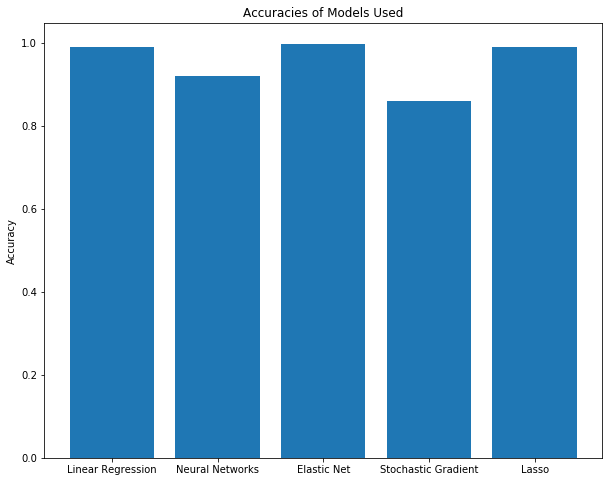

In [184]:
accuracies = [linear_score,mlp_score,els_score,sgd_score,lasso_score]
plt.figure(figsize=(10,8))
plt.bar(['Linear Regression','Neural Networks','Elastic Net','Stochastic Gradient','Lasso'],accuracies)
plt.ylabel('Accuracy')
plt.title('Accuracies of Models Used')
plt.show()

**Final Thaughts about Results**
* Even though the accuracies of the model when applied as a whole to 500 Companies 5 years of data tends to be high, when they are applied to specific companies they tend to reduce and deviate as seen from the prediction graphs ploted.
* The linear regression tends to give a very stable prediction compared with all the other training models.

## Part 3
### 1. Choose any related dataset to your current one. Combine the two into one dataset.
* We will be using another dataset taken from source given below. This dataset consists of 225 Financian Indicator values for all the companies present in the NASDAQ during 2018. 
* Because our previous dataset consists of the stock market values of SP 500 companies from 2015 to 20128, we will be trying to correlate its 2018 data with the Financial Indicators Data.

In [28]:
df = pd.read_csv(r"sector\2018_Financial_Data.csv",index_col=0)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Columns: 224 entries, Revenue to Class
dtypes: float64(222), int64(1), object(1)
memory usage: 7.5+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,1.511100e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,2.196000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,2.331700e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,1.430300e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,-2.177200e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YRIV,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,0.000000e+00,3.755251e+06,3.755251e+06,-3.755251e+06,1.105849e+07,-1.482451e+07,...,0.0000,0.0000,-0.0508,-0.1409,-0.0152,0.0000,-0.2602,Real Estate,-90.962099,0
YTEN,5.560000e+05,-0.4110,0.000000e+00,5.560000e+05,4.759000e+06,5.071000e+06,9.830000e+06,-9.274000e+06,0.000000e+00,-9.170000e+06,...,0.3445,0.0000,-0.2323,-0.8602,0.0000,0.0352,-0.0993,Basic Materials,-77.922077,0
ZKIN,5.488438e+07,0.2210,3.659379e+07,1.829059e+07,1.652633e+06,7.020320e+06,8.672953e+06,9.617636e+06,1.239170e+06,8.416324e+06,...,0.1605,0.7706,0.2489,0.4074,-0.0968,0.2415,0.8987,Basic Materials,-17.834400,0
ZOM,0.000000e+00,0.0000,0.000000e+00,0.000000e+00,1.031715e+07,4.521349e+06,1.664863e+07,-1.664863e+07,0.000000e+00,-1.664769e+07,...,0.8980,0.0000,0.1568,-0.2200,0.0000,2.7499,0.1457,Industrials,-73.520000,0


#### All the Financial Indicators / Variables in the Dataset

In [27]:
for i in range(0,len(df.columns)):
    print(df.columns[i])

Revenue
Revenue Growth
Cost of Revenue
Gross Profit
R&D Expenses
SG&A Expense
Operating Expenses
Operating Income
Interest Expense
Earnings before Tax
Income Tax Expense
Net Income - Non-Controlling int
Net Income - Discontinued ops
Net Income
Preferred Dividends
Net Income Com
EPS
EPS Diluted
Weighted Average Shs Out
Weighted Average Shs Out (Dil)
Dividend per Share
Gross Margin
EBITDA Margin
EBIT Margin
Profit Margin
Free Cash Flow margin
EBITDA
EBIT
Consolidated Income
Earnings Before Tax Margin
Net Profit Margin
Cash and cash equivalents
Short-term investments
Cash and short-term investments
Receivables
Inventories
Total current assets
Property, Plant & Equipment Net
Goodwill and Intangible Assets
Long-term investments
Tax assets
Total non-current assets
Total assets
Payables
Short-term debt
Total current liabilities
Long-term debt
Total debt
Deferred revenue
Tax Liabilities
Deposit Liabilities
Total non-current liabilities
Total liabilities
Other comprehensive income
Retained earn

#### Matching  and Combining **dataframe1** with **Dataframe2**

In [237]:
# Make sure all Missing Values are Filled
dataframe1 = dataframe.fillna(method='bfill')
dataframe2 = dataframe2.fillna(method='bfill')

# Filter out SP 500 Companies list from dataframe2
dataframe2 = dataframe2[dataframe2.index.isin(sp500_list)]


# Create Empty Dataframe
combined = pd.DataFrame(columns=dataframe1.columns.tolist()+dataframe2.columns.tolist())


In [238]:
# # Match dataframe1 symbol column to dataframe2 index values
for sym in dataframe2.index:
    d = dataframe1.loc[dataframe1['symbol']==sym] # Get Per Company Data
    d2 = dataframe2.loc[dataframe2.index==sym]
    d3 = pd.DataFrame(columns=d2.columns.tolist(),index=d.index.tolist())
    for i in range(d.shape[0]):
        d3.iloc[i,:] = d2.iloc[0,:]
    d3.index = pd.to_datetime(d3.index)
    d3.index.name = 'date'
    dc = d.merge(d3, left_index=True, right_index=True)
    combined = pd.concat([combined,dc])
print('Combined Dataframe \n -----------------------')
combined

Combined Dataframe 
 -----------------------


,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,...,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Sector,2019 PRICE VAR [%]
2015-01-02,21170000,29.000000,29.174999,28.420000,28.674999,25.720367,CMCSA,25.258636,25.143711,25.865299,...,0,1.1731e+10,0,1.1731e+10,2.56,2.53,4.5495e+09,4.5495e+09,Consumer Cyclical,32.7946
2015-01-05,33001400,28.424999,28.549999,27.830000,27.980000,25.195827,CMCSA,25.258636,25.143711,25.865299,...,0,1.1731e+10,0,1.1731e+10,2.56,2.53,4.5495e+09,4.5495e+09,Consumer Cyclical,32.7946
2015-01-06,33973200,27.940001,27.969999,27.430000,27.615000,24.867146,CMCSA,25.258636,25.143711,25.865299,...,0,1.1731e+10,0,1.1731e+10,2.56,2.53,4.5495e+09,4.5495e+09,Consumer Cyclical,32.7946
2015-01-07,22123800,27.735001,27.825001,27.385000,27.590000,24.844639,CMCSA,25.258636,25.143711,25.865299,...,0,1.1731e+10,0,1.1731e+10,2.56,2.53,4.5495e+09,4.5495e+09,Consumer Cyclical,32.7946
2015-01-08,31532400,27.875000,28.525000,27.799999,28.190001,25.384930,CMCSA,25.258636,25.143711,25.865299,...,0,1.1731e+10,0,1.1731e+10,2.56,2.53,4.5495e+09,4.5495e+09,Consumer Cyclical,32.7946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,1495400,190.309998,192.080002,187.330002,190.419998,190.419998,SNPS,188.895000,186.459001,170.030601,...,0,4.32518e+08,0,4.32518e+08,2.9,2.82,1.48588e+08,1.49036e+08,Technology,65.6157
2020-06-29,755900,190.630005,192.850006,186.320007,189.720001,189.720001,SNPS,189.462000,186.815001,170.725401,...,0,4.32518e+08,0,4.32518e+08,2.9,2.82,1.48588e+08,1.49036e+08,Technology,65.6157
2020-06-30,1161100,188.830002,195.979996,188.360001,195.000000,195.000000,SNPS,190.347000,187.414001,171.605201,...,0,4.32518e+08,0,4.32518e+08,2.9,2.82,1.48588e+08,1.49036e+08,Technology,65.6157
2020-07-01,885000,194.740005,198.089996,193.199997,196.899994,196.899994,SNPS,191.139999,188.048500,172.646401,...,0,4.32518e+08,0,4.32518e+08,2.9,2.82,1.48588e+08,1.49036e+08,Technology,65.6157


In [243]:
combined = combined.sort_index() # Make Sure the Index is Sorted in Ascending

### 2. Choose the correlated variables matching the Datasets
* The variable **symbol** of the Stock Market Data matches with the **Index** variable of the Financial Indicators dataset which basically is the company symbols.
* But our Stock Market Dataset is in Timeseries where as the Financial Indicators Dataset is a static information dataset.
* We will be trying to Integrate the Timeseries data with the Financial Indicators by matching the companies.

#### Filtered Dataset

In [72]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4392 entries, CMCSA to ZYME
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Revenue                           4346 non-null   float64
 1   Revenue Growth                    4253 non-null   float64
 2   Cost of Revenue                   4207 non-null   float64
 3   Gross Profit                      4328 non-null   float64
 4   R&D Expenses                      4155 non-null   float64
 5   SG&A Expense                      4226 non-null   float64
 6   Operating Expenses                4208 non-null   float64
 7   Operating Income                  4357 non-null   float64
 8   Interest Expense                  4208 non-null   float64
 9   Earnings before Tax               4321 non-null   float64
 10  Income Tax Expense                4252 non-null   float64
 11  Net Income - Non-Controlling int  4142 non-null   float64
 12  Net Inc

### 3. Perform statistical analysis on finding the correlation between selected features from both datasets. 

#### Analyse the Correlation between the Financial Indicators

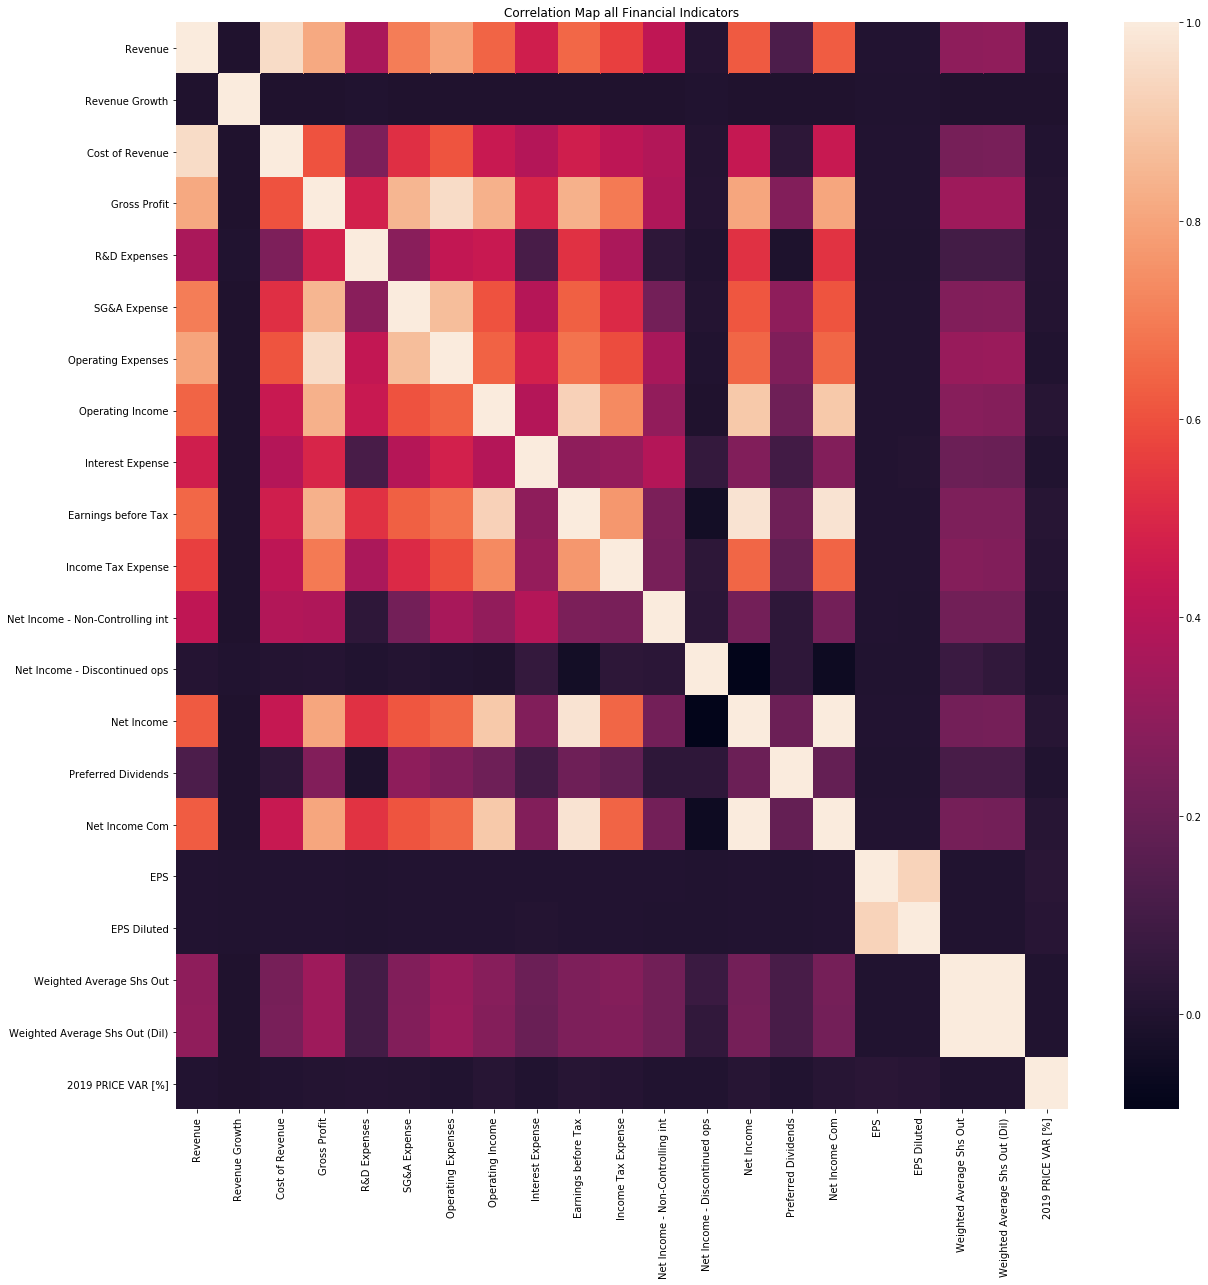

In [71]:
#We will filter out the first 22 important Financial Indicators
filter_list = df.columns[0:20].values.tolist() + ['Sector','2019 PRICE VAR [%]']
dataframe2 = df[filter_list]
df_corr = dataframe2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_corr).set_title('Correlation Map all Financial Indicators')
plt.show()

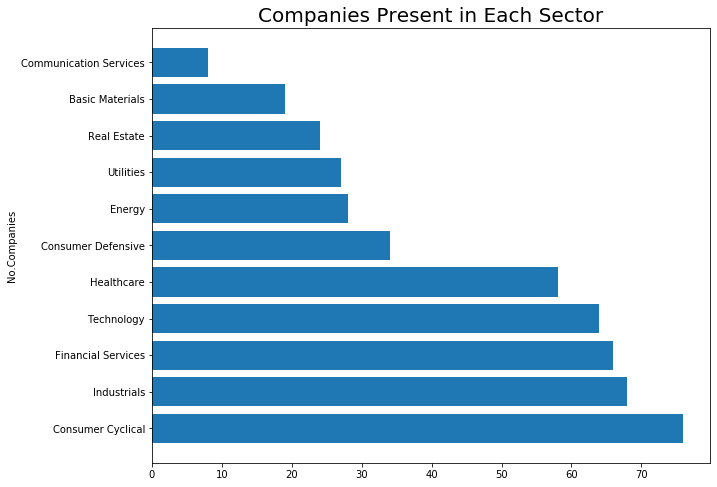

In [271]:
sectors = dataframe2['Sector'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(sectors.index.tolist(),sectors.tolist())
plt.ylabel('No.Companies')
plt.title('Companies Present in Each Sector', fontsize=20)
plt.show()

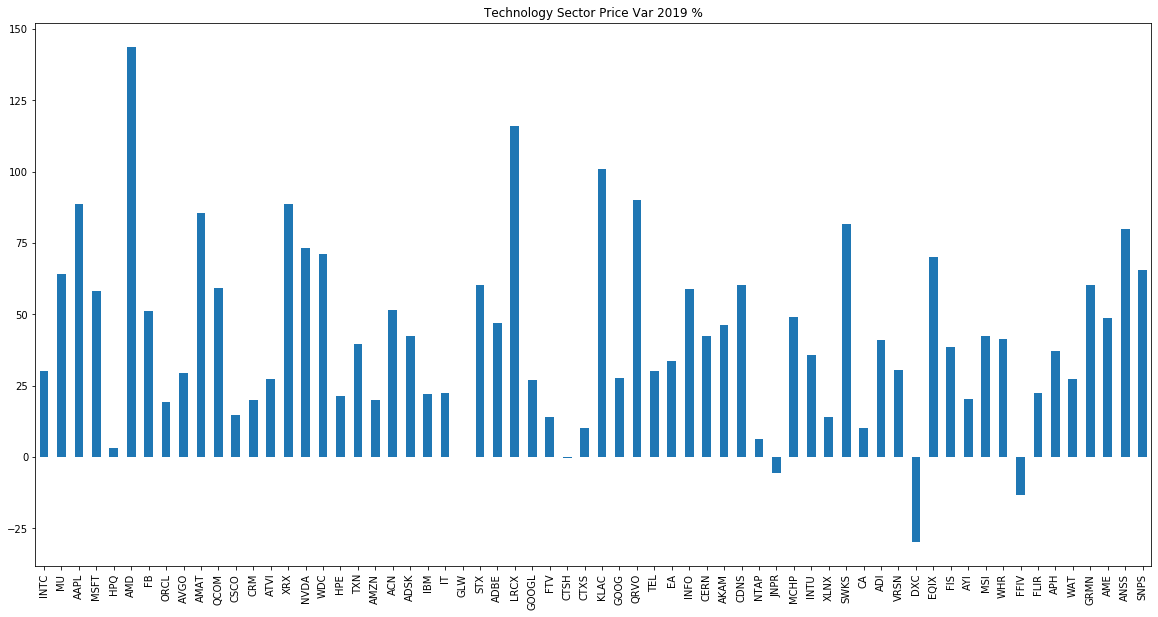

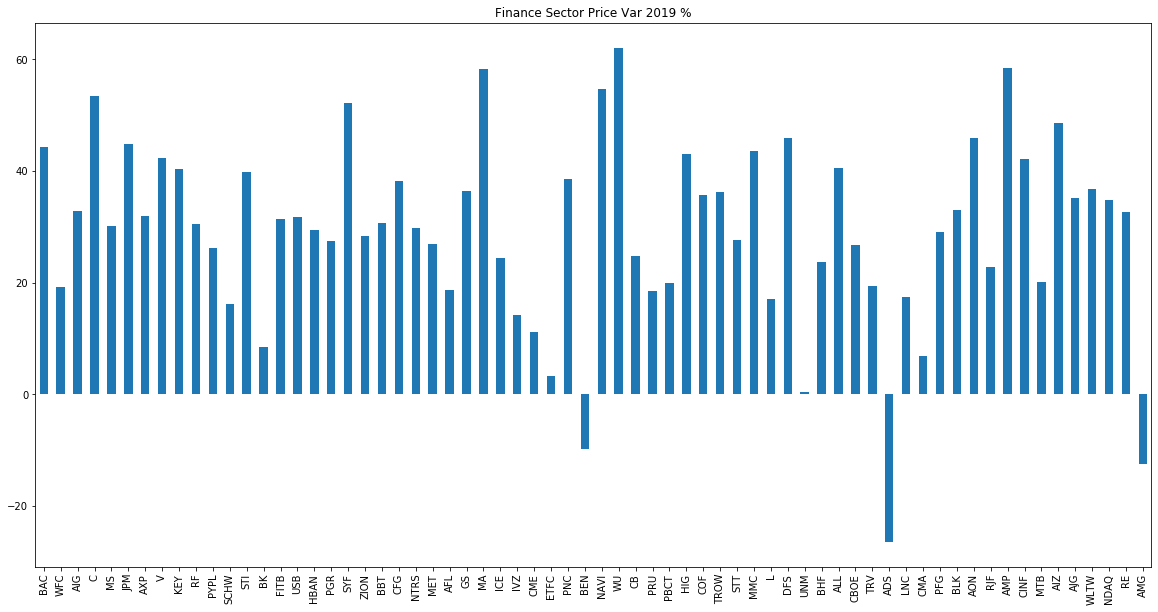

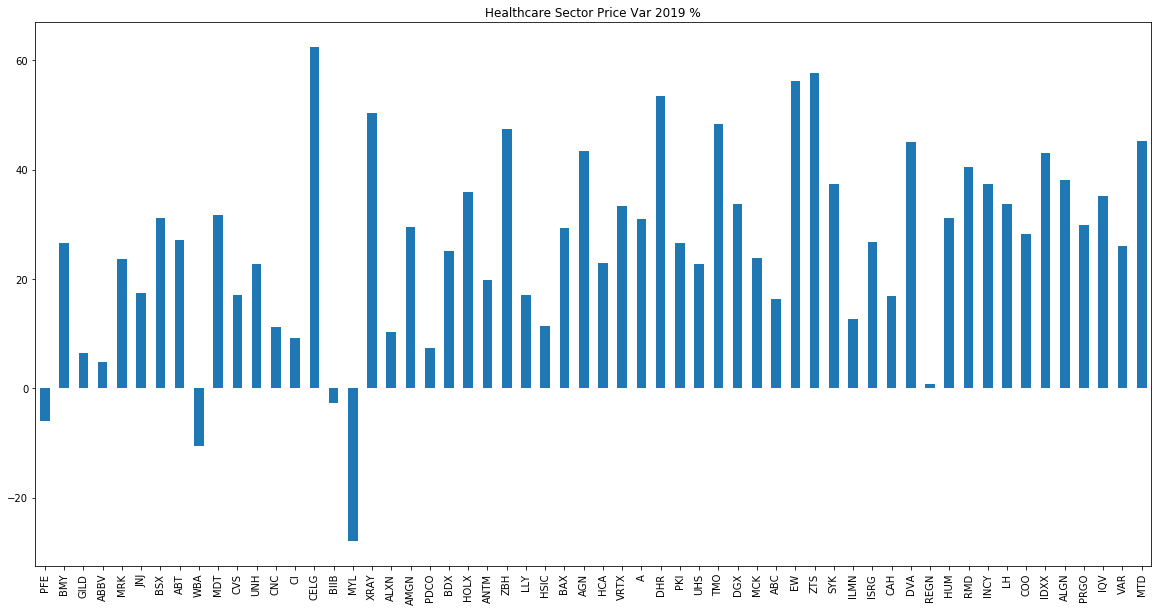

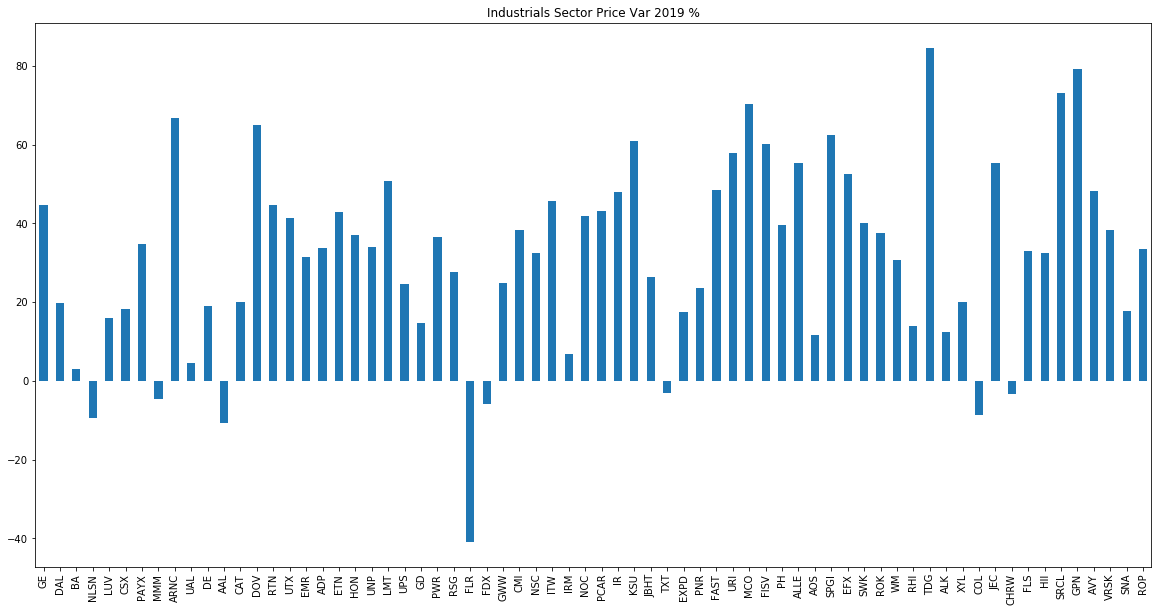

In [321]:
# facebook[['open','adjclose']].plot(kind='box',title='Open/Closing Value Range - Facebook')
# plt.show()
tech = dataframe2.loc[dataframe2['Sector']=='Technology']
finance = dataframe2.loc[dataframe2['Sector']=='Financial Services']
health = dataframe2.loc[dataframe2['Sector']=='Healthcare']
Industrials = dataframe2.loc[dataframe2['Sector']=='Industrials']


tech['2019 PRICE VAR [%]'].plot(kind='bar',figsize=(20,10),title='Technology Sector Price Var 2019 %')
plt.show()
finance['2019 PRICE VAR [%]'].plot(kind='bar',figsize=(20,10),title='Finance Sector Price Var 2019 %')
plt.show()
health['2019 PRICE VAR [%]'].plot(kind='bar',figsize=(20,10),title='Healthcare Sector Price Var 2019 %')
plt.show()
Industrials['2019 PRICE VAR [%]'].plot(kind='bar',figsize=(20,10),title='Industrials Sector Price Var 2019 %')
plt.show()

### 4. Analyse Correlation Between Time Frame and 2018 Data

In [340]:
p1 = '2018-01-02'
p2 = '2019-01-01'
t2018 =  combined.loc[(combined.index > p1)&(combined.index <= p2)] # Filter out the Combined Data between 2018 to 2019
t2018

,volume,open,high,low,close,adjclose,symbol,ma10days,ma20days,ma50days,...,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Sector,2019 PRICE VAR [%]
2018-01-03,1650100,63.959999,64.150002,63.610001,63.889999,59.548435,PLD,59.514884,60.190950,60.718463,...,0,1.64936e+09,5.935e+06,1.64343e+09,2.9,2.87,6.2953e+08,5.67367e+08,Real Estate,60.4845
2018-01-03,14587400,77.000000,78.449997,76.250000,77.190002,68.727020,D,71.550356,73.078217,72.501335,...,0,2.447e+09,0,2.447e+09,3.74,3.74,6.55083e+08,6.55083e+08,Utilities,21.9776
2018-01-03,12635600,45.490002,45.689999,45.340000,45.439999,41.821918,KO,42.127486,42.161999,42.119257,...,2.51e+08,6.434e+09,0,6.434e+09,1.51,1.5,4.25651e+09,4.259e+09,Consumer Defensive,21.6787
2018-01-03,597400,740.130005,760.000000,736.760010,749.429993,749.429993,AZO,715.510999,711.065503,656.124004,...,0,1.33754e+09,0,1.33754e+09,49.59,48.77,2.64361e+07,2.697e+07,Consumer Cyclical,42.0797
2018-01-03,2057700,54.849998,55.360001,54.750000,55.259998,50.683514,UNM,50.287289,50.704148,49.699486,...,0,5.234e+08,0,5.234e+08,2.38,2.38,2.18748e+08,2.18748e+08,Financial Services,0.341812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31,84732200,18.150000,18.510000,17.850000,18.459999,18.459999,AMD,17.968000,19.339000,20.123200,...,0,3.37e+08,0,3.37e+08,0.34,0.32,9.99407e+08,9.82e+08,Technology,143.548
2018-12-31,1387100,61.310001,61.580002,60.349998,61.080002,61.080002,AKAM,61.677000,64.760999,66.711000,...,0,2.98373e+08,0,2.98373e+08,1.78,1.76,1.62866e+08,1.67312e+08,Technology,46.382
2018-12-31,1773200,34.119999,34.369999,33.730000,34.119999,32.279541,HOG,31.594593,33.808423,35.914095,...,0,5.31451e+08,0,5.31451e+08,3.21,3.19,1.62833e+08,1.62833e+08,Consumer Cyclical,13.7489
2018-12-31,1966300,42.520000,43.799999,42.509998,43.509998,41.531292,CF,39.969693,40.006919,43.022890,...,0,2.9e+08,0,2.9e+08,1.25,1.24,2.30791e+08,2.326e+08,Basic Materials,16.698


In [349]:
# Make sure all the Numerical Columns are of float datatype 
t2018[filter_list[0:-2]+[filter_list[-1]]] = t2018[filter_list[0:-2]+[filter_list[-1]]].apply(pd.to_numeric) 
t2018.describe()

,open,high,low,close,adjclose,ma10days,ma20days,ma50days,percentchange,Revenue,...,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),2019 PRICE VAR [%]
count,91998.000000,91998.000000,91998.000000,91998.000000,91998.000000,91998.000000,91998.000000,91998.000000,91998.000000,9.199800e+04,...,9.199800e+04,9.199800e+04,9.199800e+04,9.199800e+04,9.199800e+04,91998.000000,91998.000000,9.199800e+04,9.199800e+04,91998.000000
mean,104.460061,105.580784,103.242503,104.384780,101.290574,101.401948,101.445433,101.204290,-0.000284,2.501011e+10,...,3.591169e+07,-5.855173e+06,2.502147e+09,2.007507e+07,2.483137e+09,4.756542,4.690590,6.491851e+08,6.520218e+08,28.265270
std,126.556108,127.943802,124.934110,126.438234,126.224518,126.006778,125.687223,124.437081,0.018199,4.560827e+10,...,1.343203e+08,1.943985e+08,5.510167e+09,1.323819e+08,5.478719e+09,5.644470,5.556068,1.141474e+09,1.153869e+09,25.888231
min,6.130000,6.240000,5.910000,6.110000,5.784422,6.217071,6.788413,8.055539,-0.306760,9.154360e+08,...,-1.780000e+08,-2.460000e+09,-2.235500e+10,0.000000e+00,-2.280200e+10,-14.600000,-14.600000,2.504503e+07,2.521567e+07,-54.327730
25%,46.669998,47.180000,46.119999,46.612500,44.675016,44.828229,45.010704,45.227015,-0.008792,5.193046e+09,...,0.000000e+00,0.000000e+00,4.864528e+08,0.000000e+00,4.731680e+08,1.935000,1.915000,1.661456e+08,1.669280e+08,13.859253
50%,75.185001,75.970001,74.415001,75.169998,71.780472,71.884594,71.897797,71.821793,0.000523,1.052960e+10,...,0.000000e+00,0.000000e+00,1.066000e+09,0.000000e+00,1.060801e+09,3.690000,3.670000,3.110520e+08,3.098500e+08,29.431501
75%,120.970001,122.187502,119.620003,120.830002,117.120003,117.272403,117.362224,116.906849,0.009088,2.259850e+10,...,1.400000e+07,0.000000e+00,2.460500e+09,0.000000e+00,2.460500e+09,6.172500,6.152500,5.827451e+08,5.823000e+08,42.919872
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1987.405994,1968.409503,1924.914805,0.375423,5.003430e+11,...,1.765000e+09,1.726000e+09,5.953100e+10,1.704000e+09,5.953100e+10,49.590000,48.770000,9.814197e+09,1.009650e+10,143.547535


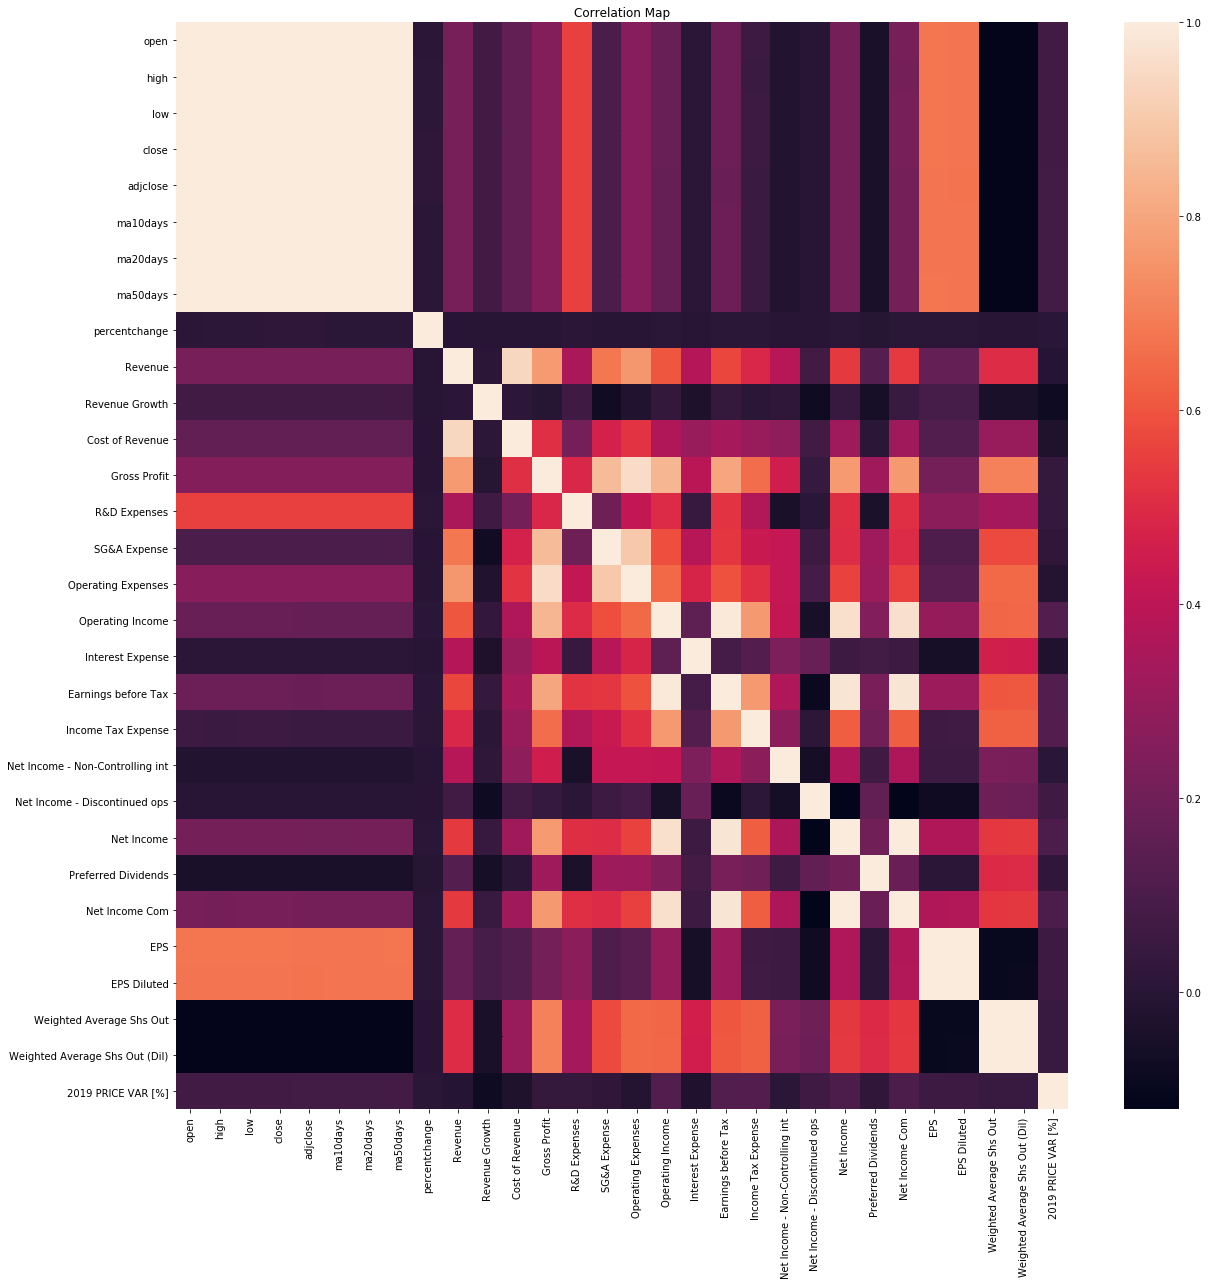

In [350]:
corr18 = t2018.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr18).set_title('Correlation Map')
plt.show()

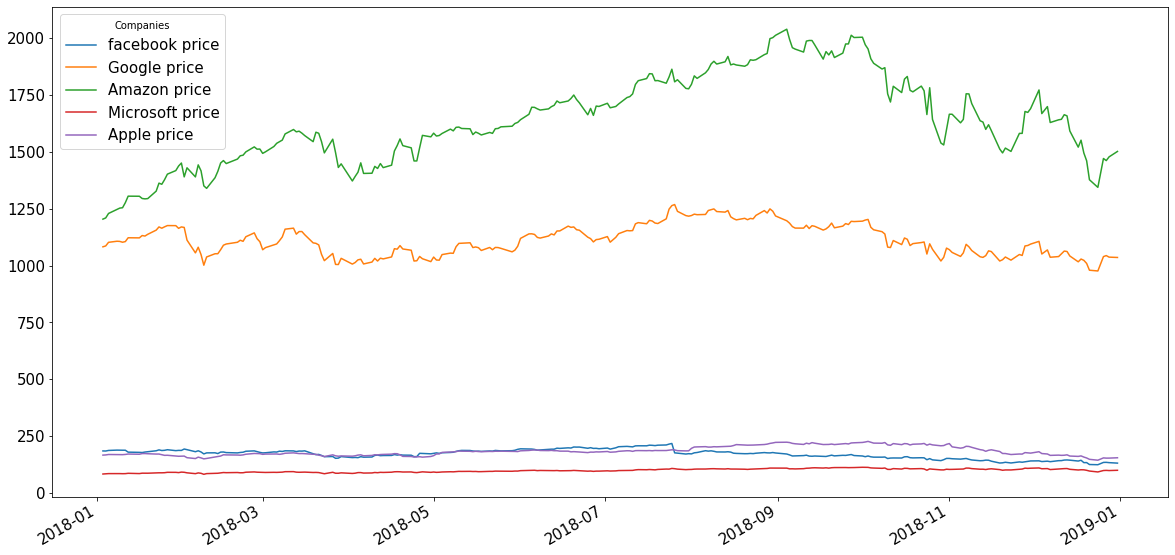

In [387]:
facebook = t2018.loc[t2018['symbol']=='FB']
google = t2018.loc[t2018['symbol']=='GOOG']
amazon = t2018.loc[t2018['symbol']=='AMZN']
microsoft = t2018.loc[t2018['symbol']=='MSFT']
apple = t2018.loc[t2018['symbol']=='AAPL']

facebook['adjclose'].plot(label = 'facebook price',figsize = (20,10),fontsize=15)
google['adjclose'].plot(label='Google price')
amazon['adjclose'].plot(label = 'Amazon price')
microsoft['adjclose'].plot(label = 'Microsoft price')
apple['adjclose'].plot(label = 'Apple price')
plt.legend(title='Companies',fontsize=15)
plt.show()

In [394]:
print('Technology Sector Based Statistical Info')
print(t2018.loc[t2018['Sector']=='Technology'].describe())
print('Healthcare Sector Based Statistical Info')
print(t2018.loc[t2018['Sector']=='Healthcare'].describe())
print('Industrials Sector Based Statistical Info')
print(t2018.loc[t2018['Sector']=='Industrials'].describe())

Technology Sector Based Statistical Info
               open          high           low         close      adjclose  \
count  13250.000000  13250.000000  13250.000000  13250.000000  13250.000000   
mean     147.630246    149.302777    145.785227    147.531199    145.699336   
std      256.945102    259.763713    253.465625    256.630991    256.926952   
min        9.080000      9.770000      9.040000      9.530000      9.530000   
25%       61.562501     62.415001     60.812501     61.455001     59.981687   
50%       89.709999     90.584999     88.609997     89.639999     87.009758   
75%      141.754997    144.022503    139.952496    141.894997    139.963120   
max     2038.109985   2050.500000   2013.000000   2039.510010   2039.510010   

           ma10days      ma20days      ma50days  percentchange       Revenue  \
count  13250.000000  13250.000000  13250.000000   13250.000000  1.325000e+04   
mean     145.703152    145.608061    144.986694      -0.000026  2.651251e+10   
std    